# <font color='red'>Backpropagation</font>

Implementing Backpropagation from scratch and then verify the correctness of our implementation using a "grader" function/cell.

The grader fucntion would help validate the correctness of code. 




## <font color='red'>Loading data </font>

In [ ]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


<font color='blue'><b>Checked this video for better understanding of the computational graphs and back propagation</font>

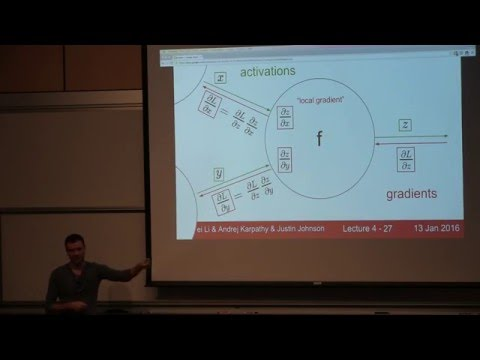

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")

# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

## <font color='red'>Task 1: Implementing Forward propagation, Backpropagation and Gradient checking </font>

# <font color='red'>Task 1.1 </font>

## <font color='blue'>Forward propagation </font>


*  <b>
    Forward propagation</b>(code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

In [ ]:
import math
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    sig=1/(1+math.exp(-z))
    return sig

In [ ]:
def grader_sigmoid(z):
  #if you have written the code correctly then the grader function will output true
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

In [ ]:
def forward_propagation(x, y, w):
        '''In this function, we will compute the forward propagation '''
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # we are computing one of the values for better understanding
        
        val1= (w[0]*x[0]+w[1]*x[1]) * (w[0]*x[0]+w[1]*x[1]) + w[5]
        part1 = np.exp(val1)
        part2=math.tanh(part1+w[6])
        val3=(w[3]*x[3])+(w[4]*x[4])
        val4=val3*(math.sin(w[2]*x[2]))
        val2=val4+w[7]
        part3=sigmoid(val4+w[7])  
        # after computing part1,part2 and part3 compute the value of y' from the main Computational graph using required equations
        # write code to compute the value of L=(y-y')^2 and store it in variable loss
        # compute derivative of L  w.r.to y' and store it in dy_pred 
        # Create a dictionary to store all the intermediate values i.e. dy_pred ,loss,exp,tanh,sigmoid
        # we will be using the dictionary to find values in backpropagation, you can add other keys in dictionary as well
        ypred=part2+(w[8]*part3)
        L=(y-ypred)*(y-ypred)
        dypred=-2*(y-ypred)    
        forward_dict={}
        forward_dict['exp']= part1
        forward_dict['sigmoid'] =part3
        forward_dict['tanh'] =part2
        forward_dict['loss'] =L
        forward_dict['dy_pred'] = dypred
        forward_dict['val_2']=val2
        
        return forward_dict

In [ ]:
def grader_forwardprop(data):
    dl = (data['dy_pred']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

# <font color='red'>Task 1.2 </font>

## <font color='blue'>Backward propagation</font>

In [ ]:
def backward_propagation(x,y,w,forward_dict):
    '''In this function, we will compute the backward propagation '''
    # forward_dict: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    # dw9 = # in dw9 compute derivative of L w.r.to w9
    
    i3=math.tanh(w[6]+forward_dict['exp'])
    dq3=(forward_dict['dy_pred'])*(1-(i3*i3))

    dw7=dq3  

    val1=(w[0]*x[0]+w[1]*x[1]) * (w[0]*x[0]+w[1]*x[1]) + w[5]
    i4=math.exp(val1)
    dq4=dq3*i4

    dw6=dq4 

    i6=(w[0]*x[0])+(w[1]*x[1])
    dq6=dq4*i6

    dw1=2*dq6*x[0]  

    dw2=2*dq6*x[1]

    dw9=(forward_dict['dy_pred'])*(forward_dict['sigmoid'])

    dp3=(forward_dict['dy_pred'])*w[8]

    dq10=dp3*(sigmoid(forward_dict['val_2']))*(1-sigmoid(forward_dict['val_2']))

    dw8=dq10
     
    i12=(w[3]*x[3])+(w[4]*x[4])
    dq12=dq10*i12

    dq13=dq10*(math.sin(w[2]*x[2]))

    dq14=dq12*(math.cos(w[2]*x[2]))

    dw3=dq14*x[2]

    dw4=dq13*x[3]

    dw5=dq13*x[4]
    
    
    backward_dict={}
    #store the variables dw1,dw2 etc. in a dict as backward_dict['dw1']= dw1,backward_dict['dw2']= dw2...
    backward_dict['dw1']=dw1
    backward_dict['dw2']=dw2
    backward_dict['dw3']=dw3
    backward_dict['dw4']=dw4
    backward_dict['dw5']=dw5
    backward_dict['dw6']=dw6
    backward_dict['dw7']=dw7
    backward_dict['dw8']=dw8
    backward_dict['dw9']=dw9
    
    return backward_dict

In [ ]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],6)==-0.229733)
    dw2=(np.round(data['dw2'],6)==-0.021408)
    dw3=(np.round(data['dw3'],6)==-0.005625)
    dw4=(np.round(data['dw4'],6)==-0.004658)
    dw5=(np.round(data['dw5'],6)==-0.001008)
    dw6=(np.round(data['dw6'],6)==-0.633475)
    dw7=(np.round(data['dw7'],6)==-0.561942)
    dw8=(np.round(data['dw8'],6)==-0.048063)
    dw9=(np.round(data['dw9'],6)==-1.018104)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
forward_dict=forward_propagation(X[0],y[0],w)
backward_dict=backward_propagation(X[0],y[0],w,forward_dict)
grader_backprop(backward_dict)

True

# <font color='red'>Task 1.3 </font>

 ## <font color='blue'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <font color='red'> Implementing Gradient checking </font> <br>
 (code in <font color='blue'> def gradient_checking()</font>)

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
</pre></b>

In [ ]:
def gradient_checking(x,y,w,eps):
    # compute the dict value using forward_propagation()
    # compute the actual gradients of W using backword_propagation()
    forward_dict=forward_propagation(x,y,w)
    backward_dict=backward_propagation(x,y,w,forward_dict)
    
    #we are storing the original gradients for the given datapoints in a list
    
    original_gradients_list=list(backward_dict.values())
    
    approx_gradients_list=[]
    #now we have to write code for approx gradients, here you have to make sure that you update only one weight at a time
    #write your code here and append the approximate gradient value for each weight in  approx_gradients_list
    for a,wi in enumerate(w):
      w[a]=wi+eps
      forward_dict1=forward_propagation(x,y,w)
      y1=forward_dict1['loss']
      w[a]=wi-eps
      forward_dict1=forward_propagation(x,y,w)
      y2=forward_dict1['loss']
      approx=(y1-y2)/(2*eps)
      approx_gradients_list.append(approx)
      w[a]=wi   
    #performing gradient check operation
    original_gradients_list=np.array(original_gradients_list)
    approx_gradients_list=np.array(approx_gradients_list)
    gradient_check_value =(original_gradients_list-approx_gradients_list)/(original_gradients_list+approx_gradients_list)
    
    return gradient_check_value
    

In [ ]:
def grader_grad_check(value):
    print(value)
    assert(np.all(value <= 10**-3))
    return True 

w=[ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,
   0.00114524,  0.00684168,  0.02242521,  0.01296444]

eps=10**-7
value= gradient_checking(X[0],y[0],w,eps)
grader_grad_check(value)

[-1.73921918e-08  1.63713365e-06  5.73356054e-05  3.77243270e-05
 -1.95446016e-04 -1.16536595e-10 -3.79907639e-10 -1.06774472e-07
 -7.02865325e-10]


True

# <font color='red'> Task 2 : Optimizers </font>

* implementing 2  optimizers(methods to update weight)
* Used the same computational graph that was mentioned above to do this task
* The weights have been initialized from normal distribution with mean=0 and std=0.01. The initialization of weights is very important otherwiswe you can face vanishing gradient and exploding gradients problem.

**Checked below video for reference purpose**

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-20):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  
</pre>

### <font color='blue'>2.1 Algorithm with Vanilla update of weights</font>

[0.035508564290643786, 0.03757822526372132, 0.03756241753842036, 0.037463141140955517, 0.03715678185260857, 0.036227507240923475, 0.033594377080768595, 0.027434425769409392, 0.017935673902504223, 0.009802898754138778, 0.005329552019767011, 0.0032022606986779247, 0.002191868655740056, 0.001694922832459609, 0.0014384504338037674, 0.001297656629896521, 0.0012142446705019209, 0.0011603882667931607, 0.0011224852812199257, 0.0010936815200828672]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


Text(0.5, 1.0, 'Loss Vs Epoch')

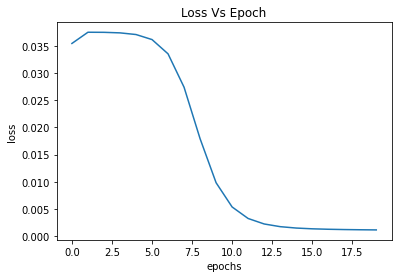

In [ ]:
#vanilla update:wt+1=wt-eta*dL/dw
import matplotlib.pyplot as plt
total_loss=[]
epochs=[]
w=[ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,
   0.00114524,  0.00684168,  0.02242521,  0.01296444]
for epoch in range(0,20):
  for a,data in enumerate(X):
    forward_dict=forward_propagation(data,y[a],w)
    backward_dict=backward_propagation(data,y[a],w,forward_dict)
    #print()
    backward_values=list(backward_dict.values())
    #print(type(backward_values))
    #print(backward_values)
    for i in range(0,len(w)):
      w[i]=w[i]-(0.01*backward_values[i])
  loss=0.0
  for a,data in enumerate(X):
    fd1=forward_propagation(data,y[a],w)
    loss=loss+fd1['loss']
  total_loss.append(loss/len(X))
  epochs.append(epoch)
print(total_loss)
print(epochs)
plt.plot(epochs,total_loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss Vs Epoch")

### <font color='blue'>2.2 Algorithm with Momentum update of weights</font>

<img src='https://i.imgur.com/gyPSXhS.png'>

Here Gamma referes to the momentum coefficient, eta is leaning rate and v_t is moving average of our gradients at timestep t

[0.029913499244839305, 0.0032762177918064252, 0.0022258892526683988, 0.002068207785583905, 0.0019197432728182717, 0.0017306318750500336, 0.0015302276820481448, 0.0013342589356783593, 0.00115052221914405, 0.000983188637887642, 0.0008341949299446168, 0.0007038896313257638, 0.0005915265257160974, 0.0004956851203203397, 0.00041460430963122767, 0.0003464217732093514, 0.00028932859005811716, 0.000241657441430625, 0.00020192392831736575, 0.0001688375985533983]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


Text(0.5, 1.0, 'Loss Vs Epoch')

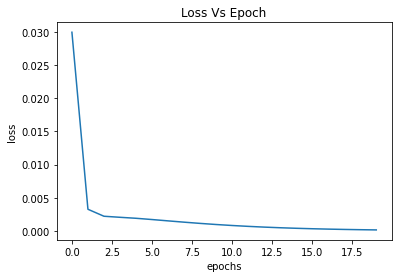

In [ ]:
#Momentum based gradient descent update rule
import matplotlib.pyplot as plt
total_loss=[]
epochs=[]
v=[0,0,0,0,0,0,0,0,0]
gamma=0.9
w=[ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,
   0.00114524,  0.00684168,  0.02242521,  0.01296444]
for epoch in range(0,20):
  for a,data in enumerate(X):
    forward_dict=forward_propagation(data,y[a],w)
    backward_dict=backward_propagation(data,y[a],w,forward_dict)
    #print()
    backward_values=list(backward_dict.values())
    #print(type(backward_values))
    #print(backward_values)
    for i in range(0,len(v)):
      v[i]=(gamma*v[i])+(0.01*backward_values[i])
    for i in range(0,len(w)):
      w[i]=w[i]-v[i]
  loss=0.0
  for a,data in enumerate(X):
    fd1=forward_propagation(data,y[a],w)
    loss=loss+fd1['loss']
  total_loss.append(loss/len(X))
  epochs.append(epoch)
print(total_loss)
print(epochs)
plt.plot(epochs,total_loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss Vs Epoch")

### <font color='blue'>2.3 Algorithm with Adam update of weights</font>

<img src='https://i.imgur.com/GDR8UFP.jpg'>

[1.020489366119693, 0.99343196529566, 0.966687855176515, 0.9402805321741091, 0.9142325139874521, 0.8885661158930314, 0.8633038388238851, 0.8384685439152239, 0.814083489523327, 0.7901722621184222, 0.7667586118773125, 0.7438661943332485, 0.7215182159071464, 0.6997369815955907, 0.6785433468833802, 0.6579560828886127, 0.6379911736217819, 0.6186610764681574, 0.5999739903651622, 0.5819331886002874, 0.5645364818454798, 0.5477758786478352, 0.5316375021047096, 0.5161018013404949, 0.5011440658640972, 0.48673521448925827, 0.47284279561525233, 0.45943211042641263, 0.44646736098697415, 0.4339127327947186, 0.42173334258207845, 0.4098960100945382, 0.3983698398409561, 0.38712662013673155, 0.37614106011879184, 0.3653908915008951, 0.3548568627432509, 0.3445226512386186, 0.3343747157173407, 0.32440210732698943, 0.3145962542409978, 0.3049507314162237, 0.295461024344337, 0.28612429335367195, 0.2769391432026469, 0.267905401318701, 0.2590239070142029, 0.25029631328070373, 0.24172490225366364, 0.2333124150867

Text(0.5, 1.0, 'Loss Vs Epoch')

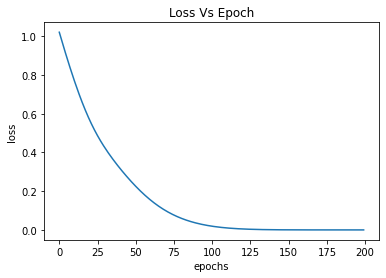

In [ ]:
#Momentum based gradient descent update rule
import matplotlib.pyplot as plt
total_loss=[]
epochs=[]
v=[0,0,0,0,0,0,0,0,0]
vt=[0,0,0,0,0,0,0,0,0]
m=[0,0,0,0,0,0,0,0,0]
mt=[0,0,0,0,0,0,0,0,0]
beta1=0.9
beta2=0.999
gamma=0.9
#w=np.ones(9)*0.1
w=[ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768, 0.00114524,  0.00684168,  0.02242521,  0.01296444]
for epoch in range(0,200):
  d1,d2,d3,d4,d5,d6,d7,d8,d9,b=0,0,0,0,0,0,0,0,0,0
  backward_values=[]
  for a,data in enumerate(X):
    forward_dict=forward_propagation(data,y[a],w)
    fd2=forward_dict['loss']
    b=b+fd2
    backward_dict=backward_propagation(data,y[a],w,forward_dict)
    d1=d1+backward_dict['dw1']
    d2=d2+backward_dict['dw2']
    d3=d3+backward_dict['dw3']
    d4=d4+backward_dict['dw4']
    d5=d5+backward_dict['dw5']
    d6=d6+backward_dict['dw6']
    d7=d7+backward_dict['dw7']
    d8=d8+backward_dict['dw8']
    d9=d9+backward_dict['dw9']
  backward_values.append(d1/len(X))
  backward_values.append(d2/len(X))
  backward_values.append(d3/len(X))
  backward_values.append(d4/len(X))
  backward_values.append(d5/len(X))
  backward_values.append(d6/len(X))
  backward_values.append(d7/len(X))
  backward_values.append(d8/len(X))
  backward_values.append(d9/len(X))
    #print()
    #backward_values=list(backward_dict.values())
    #print(type(backward_values))
    #print(backward_values)
  for i in range(0,len(v)):
      v[i]=(beta2*v[i])+((1-beta2)*(backward_values[i]*backward_values[i]))
    #print(a)
   # print(v)
  for i in range(0,len(m)):
      m[i]=(beta1*m[i])+((1-beta1)*(backward_values[i]))
    #print(a)
    #print(m)
  for i in range(0,len(mt)):
      mt[i]=m[i]/(1-pow(beta1,epoch+1))
    #print(a)
    #print(mt)
    #print(mt)
  for i in range(0,len(vt)):
      vt[i]=v[i]/(1-pow(beta2,epoch+1))
    #print(a)
    #print(vt)
    #print(vt)
  for i in range(0,len(w)):
      w[i]=w[i]-((0.01*mt[i])/(np.sqrt(vt[i])+1e-8))
  loss=0.0
  for a,data in enumerate(X):
    fd1=forward_propagation(data,y[a],w)
    loss=loss+fd1['loss']
  total_loss.append(loss/len(X))
  epochs.append(epoch)
print(total_loss)
print(epochs)
plt.plot(epochs,total_loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss Vs Epoch")